# Milestone2

# 1. Introduction

The goal of this software is to perform automatic differentiation (AD), a technique crucial to many fields in modern science. Automatic differentiation forgoes symbolic differentiation (too dense with complex equations) and numerical differentiation (prone to round-off errors in discretization process and cancellation, truncation error in estimating the derivative) by taking an exact x for which to iteratively update the actual value and gradient. This allows machine level precision in complex, nonlinear systems of equations that are impossible to find analytically.

For instance, in neural networks, AD allows us to find the optimal combination of millions of parameters via gradient-based optimization.



# 2. Background


## 2.1 The Chain Rule
$y = f(g(h(x)))$
From inside to out side: 
$$w1 = h(x)$$
$$w2 = g(w1)$$
$$y = f(w2)$$
The derivative with respect to x: 
$$\frac{dy}{dx} = \frac{dy}{dw_{2}} \frac{dw_{2}}{dw_{1}} \frac{dw_{1}}{dx}$$ 

## 2.2 Computational Graph
Except input nodes, each node v will represent an intermediate result of the computation. The intermediate results can then be assembled using the chain rule to get the final derivative we’re looking for.

Below is the computational graph of $$ y = f(x_{1}, x_{2}) = \ln(x_{1}) + x_{1}x_{2} - \sin(x_{2})$$

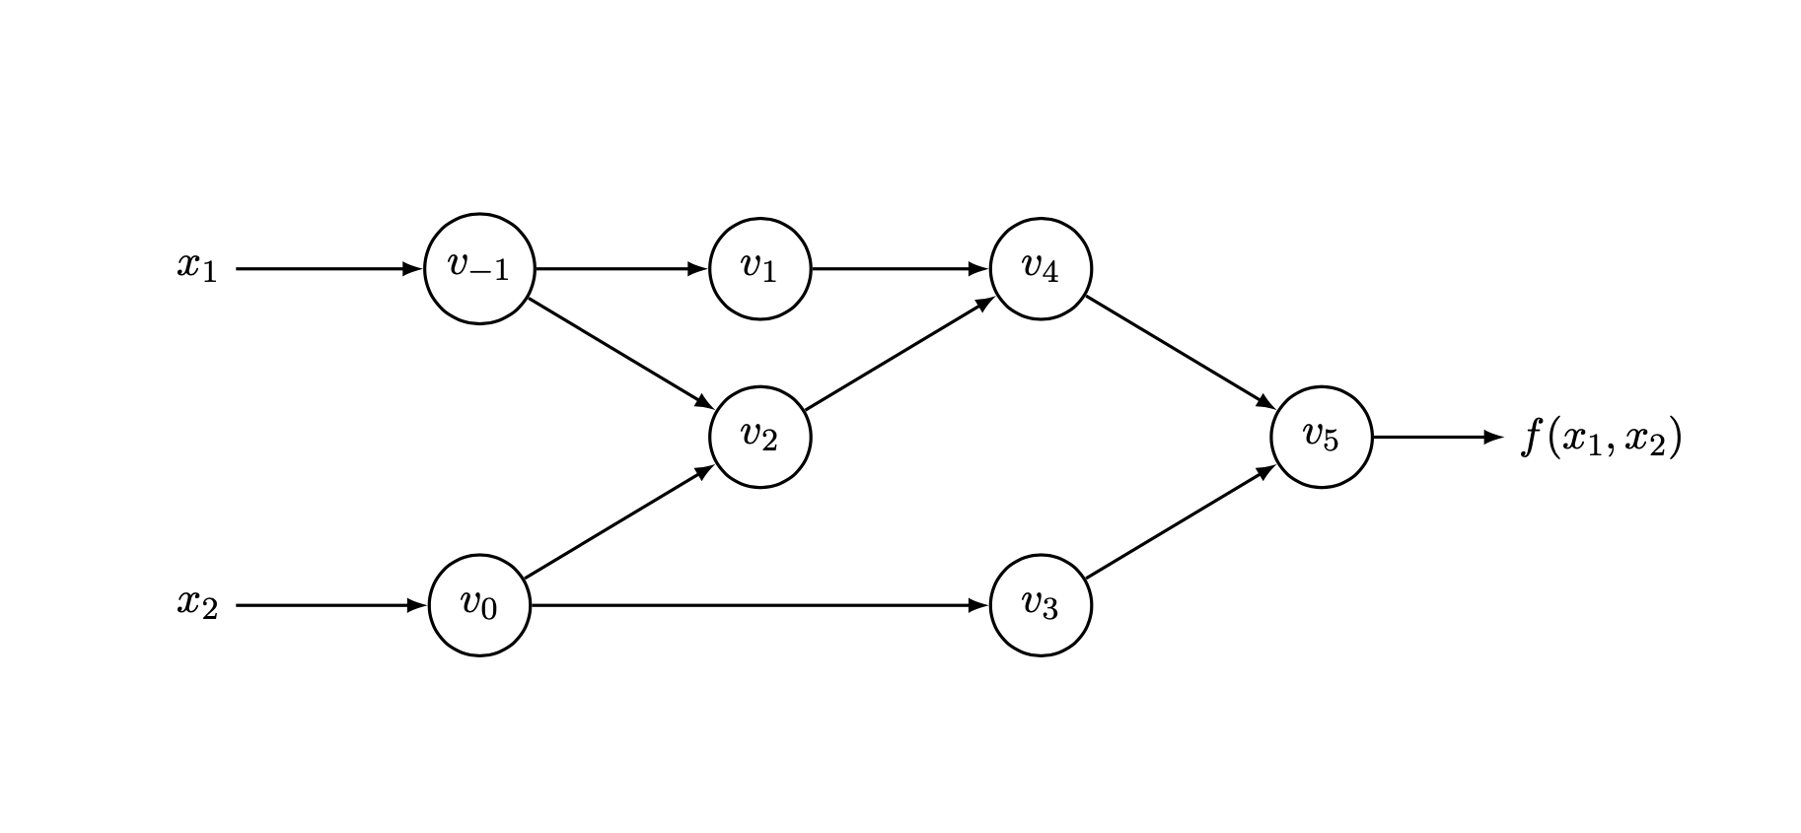










### 2.2.1 Forward Mode AD
In forward AD, we simply apply the chain rule to each basic operation in a forward primal trace and obtain a forward derivative trace.

Below is the forward mode AD correspondent to the computational graph above. 



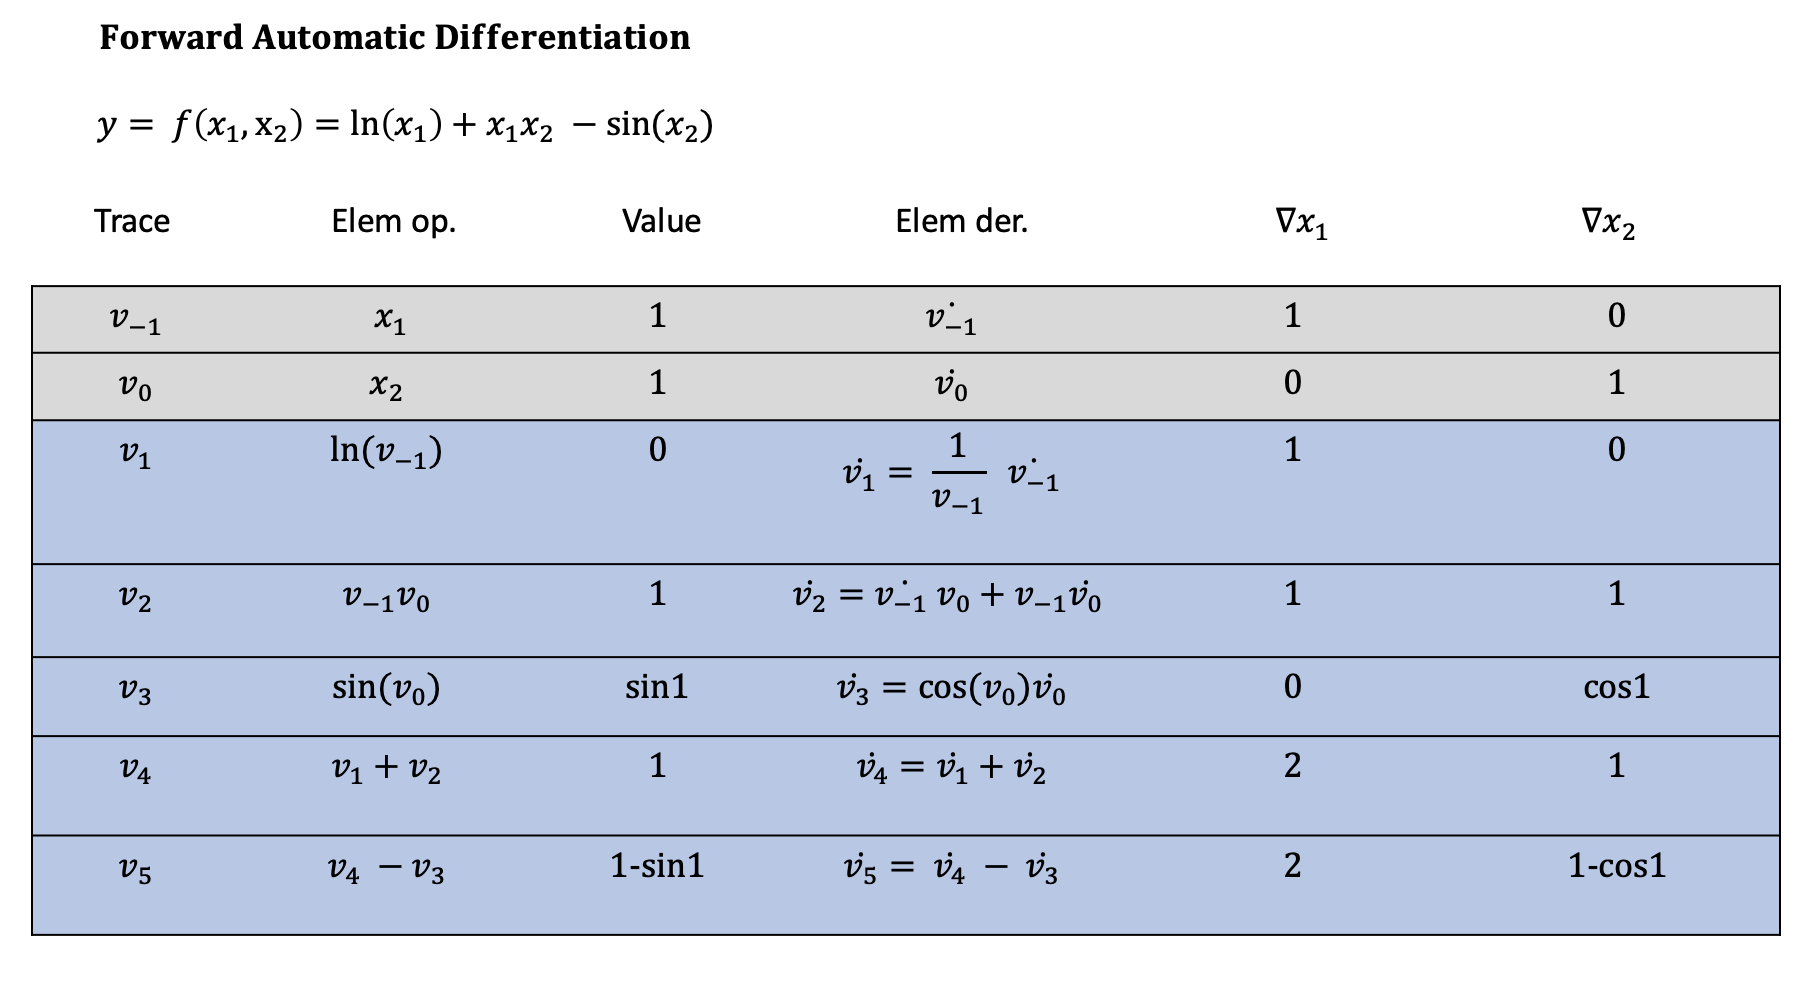


Automatic differentiation is a crucial part in the modern deep learning framework. However, the forward mode implemented above cannot scale well when the deep learning framework is enormous and complicated. Therefore, we proceed to implement the reverse mode of automatic differentiation. Reverse mode is result-oriented, thus it will only store essential information in the intermediate steps. The efficiency of reverse mode gives it an edge over forward mode and it is mainly used in the deep learning framework. 



### 2.2.2 Reverse Mode AD
In reverse AD, there are two separate phases. During a forward phase, all intermediate variables are evaluated and their values stored in memory. In a following backward phase, we then propagates back the derivatives/adjoints with the help of the chain rule. Reverse mode AD is what we commonly refer to as backpropagation (Rumelhart et al., 1988) in Deep Learning.

Below is the reverse mode AD correspondent to the computational graph above. 





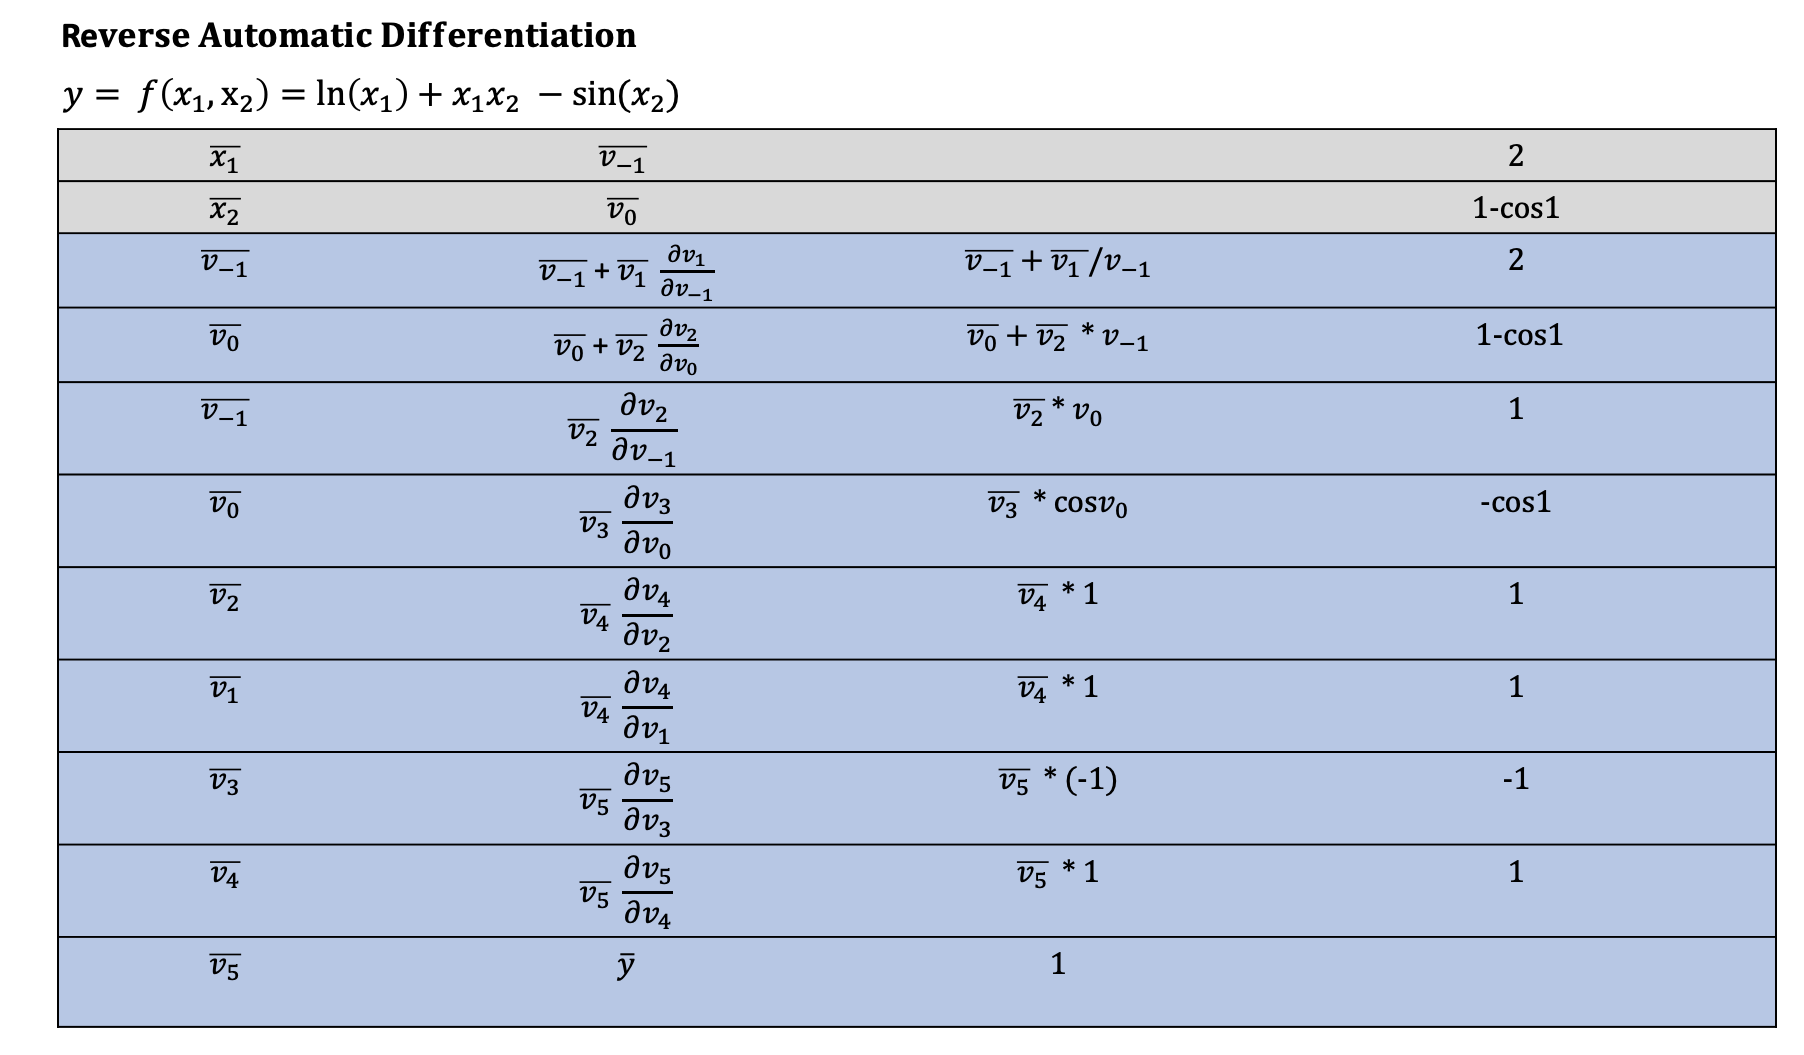

## 2.3 Elementary Functions


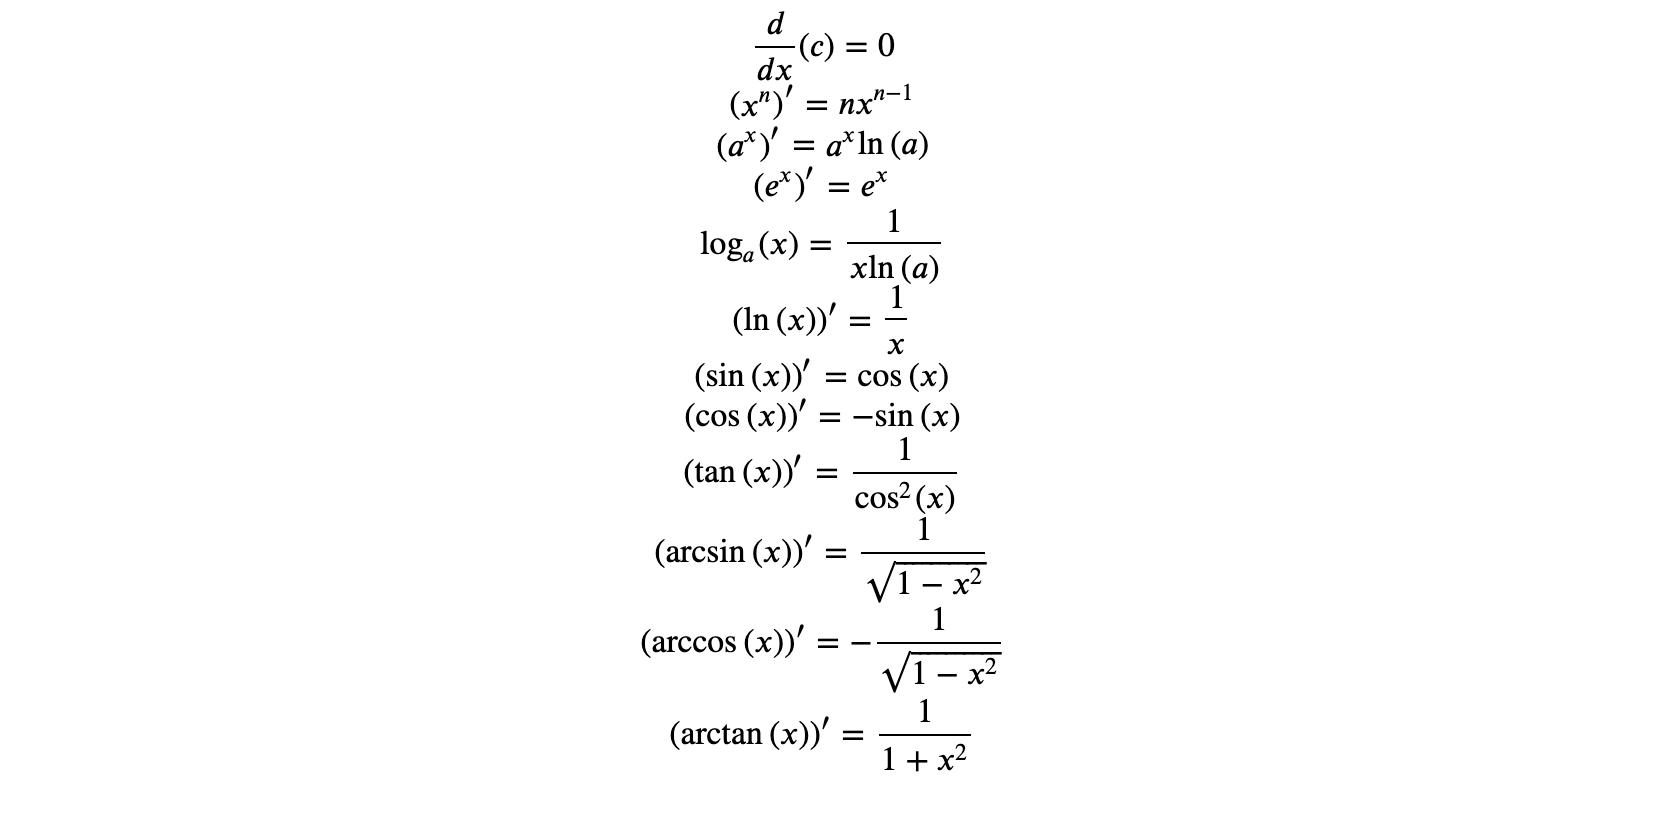



## 2.4 AD with Dual Number

Definition of dual number: z = a + b$\epsilon$,where a,b is real number, $\epsilon^2 = 0$ and $\epsilon \neq 0$

It can be shown that dual numbers can be used as a data structure in forward mode automatic differentiation:

-Adding dual numbers together resembles the linearity of addition and results in adding the functions in the real part and adding the derivatives in the dual part.

-Multiplication results in multiplication of the functions in the real part and the correct product rule for the derivatives in the dual part.


In forward mode AD, we can use dual numbers to carry $v_{j}$ and $D_{p}v_{j}$ forward simultaneously as a pair, where the real part corresponds to the primal trace and the dual part corresponds to the derivative trace.

For example, 

$$z_{1} = v_{1} + D_{p}v_{1}\epsilon$$

$$z_{2} = f(z_{1}) = \sin{(z_{1})}$$

$$z_{2} = \sin{(z_{1})} = \sin{(v_{1})} + \cos{(v_{1})}D_{p}v_{1}\epsilon = v_{2} + D_{p}v_{2}$$


## 2.5 References
Baydin A G, Pearlmutter B A, Radul A A, et al. Automatic differentiation in machine learning: a survey[J]. Journal of machine learning research, 2018, 18.

# 3. How to use AutomaticDifferentiation

## 3.1 Install Package
  
### STEP 1 ) Create  Enviroment 
It is important to create a virtual environment when install different packages since it will prevent conflict with other projects or the operating system's packages.

We will be using pythons **venv** module to create the virtual environment. If you do not have python set up in your computer please follow the following guidelines here: [https://realpython.com/installing-python/](https://realpython.com/installing-python/)

Now please run the following lines in your terminal to create your virtual environment:

**Windows User**

```
$mkdir autodiff
$cd autodiff
$py -3 -m venv venv

```

**Linux**

```
$mkdir autodiff
$cd autodiff
$python3 -m venv venv
```

### STEP 2 ) Activate Enviornment 
We will now activate the virtual enviornment we just created:

**Windows User**

```
$venv\Scripts\activate
```

**Linux**

```
$ . venv/Scripts/activate
```

To deactivate the virtual enviornment

**Windows User**

```
$deactivate
```

**Linux**

```
$deactivate
```


### STEP 3 ) Install Package
We can install and update our package with the following terminal commands:

###### Option A:
We can easily install our package with testpypi(https://test.pypi.org/project/AutomaticDifferentiation/0.0.1/) using the command below: 

```
pip install -i https://test.pypi.org/simple/ AutomaticDifferentiation==0.0.1
```


###### Option B:
**Windows User**

```
pip install git+https://github.com/cs107-sandbox/cs107-FinalProject
```

**Linux**

```
pip install git+https://github.com/cs107-sandbox/cs107-FinalProject
```


###### Option C:
We can also installed the required files from our GitHub running the following commands: 

**Windows User**

```
git clone https://github.com/cs107-sandbox/cs107-FinalProject.git
```

**Linux**

```
git clone https://github.com/cs107-sandbox/cs107-FinalProject.git
```

Remember to install all the needed dependencies in the requirement.txt file:

**Windows User**

```
py -m pip install -r requirements.txt
```

**Linux**
```
python3 -m pip install -r requirements.txt
```

This is an overview of how to install we install the AutomaticDifferentiation Package in a virtual environment from the above steps:

![testpypi_installa](testpypi_install.png)

## 3.2 Interacting with AutomaticDifferentiation

Users will create AutoDiffToy class objects to perform forward-mode automatic differentiation. 
As an example, finding the gradient of a simple function $x^2 + 2.0 * x + 3.0$ will look like:

\>\>\> a = 2.0  # Value to evaluate at

\>\>\>  x = AutoDiffToy(a, der=1, label="x")

\>\>\>  f = x ** 2 + 2.0 * x + 3.0

\>\>\>  f.val 

11.0

\>\>\> f.der

6.0

\>\>\> f.label

'x'


We add more detailed descriptions for every elementary function in the implementation section. 

# 4. Software Organization

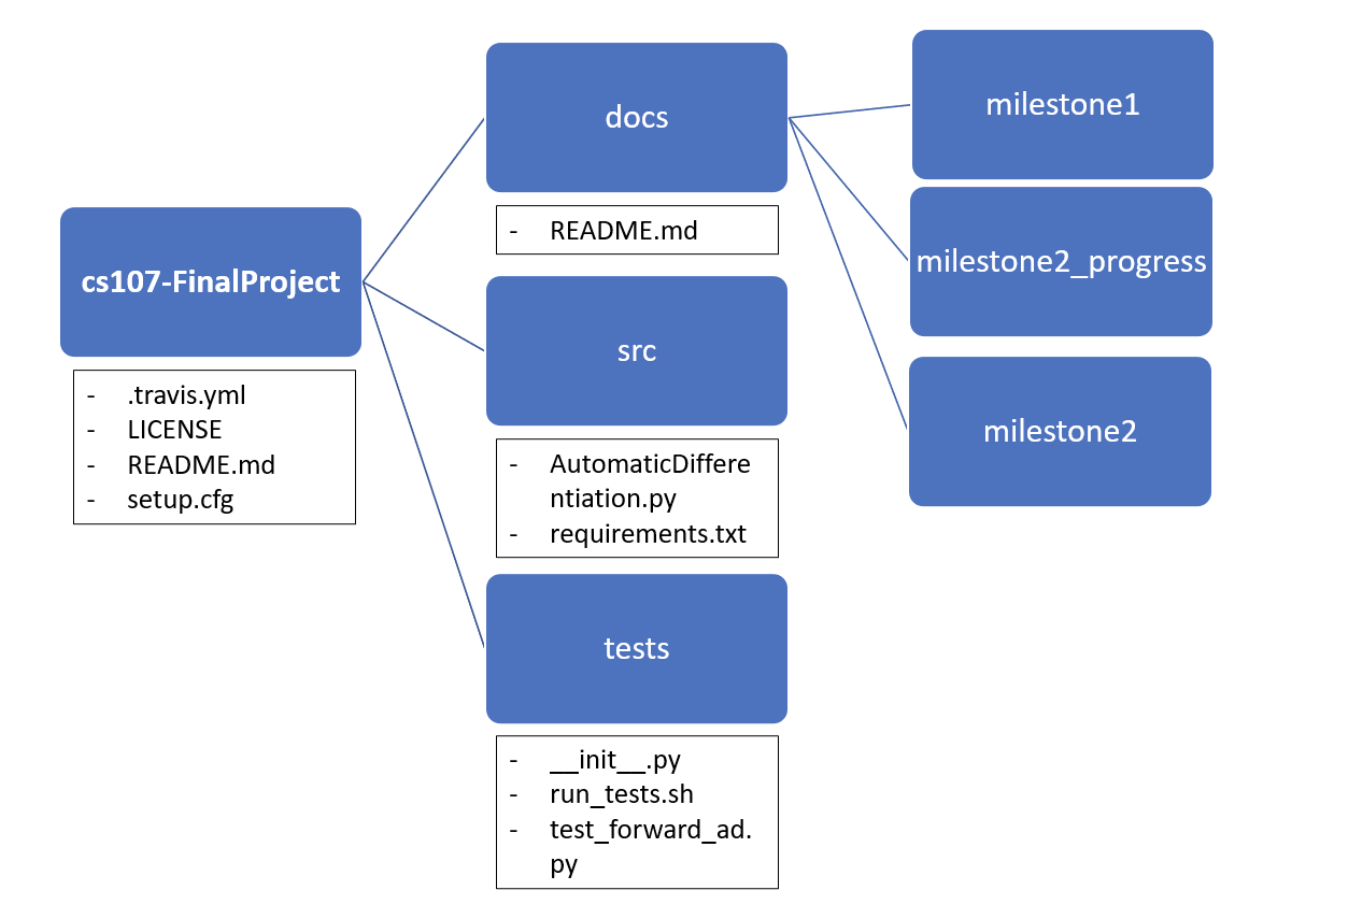


The directory structure looks similar to the diagram above. It has a separate docs, src, and tests folder. In the root directory, we have pyproject.toml, README.md, LICENSE, setup.cfg (with metadata about the package and authors), along with a .travis.yml file we created in anticipation of a future setup where tests can run automatically on Travis CI. In docs, we have a readme file, and the milestone jupyter notebook files under separate folders. All source code will be placed into src. As of now, we only have one script called AutomaticDifferentiation.py. We may add other modules to the directory as we continue to integrate and work on the project, e.g., reverse mode differentiation. There seems to be little need for nested structures for now, as the functionalities of our package are simple. AutomaticDifferentiation.py allows users to create single-input scalar functions, and allows them to implement addition, multiplication, subtraction, division, power, exponential, sine, cosine, and tangent on ad objects (variables). See implementation details for further information. 

In a separate test/ directory, we have our test files that test our code with different cases, test\_forward\_ad.py. A series of unit tests using pytest (e.g., whether addition is properly overwritten to return the right value, derivative, and does not alter the variable label) lives inside class TestFunctions. We also test edge cases (e.g., tan(2/pi)) and make sure our function properly throws errors as expected. We define the type of tests to be made with pseudo-code (i.e., a partial adoption of black-box testing strategy) based on the software requirements specification as defined by the milestone 2 document, then write the tests based on our actual AutomaticDifferentiation script. Our tests are named as convention, prepended with “test\_”. A driver script (bash script), run_tests.sh, runs all our tests. While we do not use Travis CI or Codecov in the project, the bash script prepares us for CI provider integration. For instance with Travis CI, we could specify the bash script in the .travis.yml file so that our test file is run every time a build is triggered.

We upload our package to PyPi for installation. A user can install the package with the line: pip install git+https://github.com/cs107-sandbox/cs107-FinalProject and pip install -r requirements.txt . Please see ‘How to use our package’ section for more information on installation. 






# 5. Implementation Details


## What we have implemented:

We have implemented a toy AD class which can deal with scalar functions of a single input.

- Core data structure: list 

- Core class: AutoDiffToy

- External dependecies: numpy

- Elemetary functions: addition, multiplication, subtraction, division, power, negation, exponential, sine, cosine, tangent.

- Attributes:

1. self.val: value at each node
2. self.der: derivatives with respect to each variable
3. self.label: variable name

- Methods:

**1. \__init\__(self, val, der=1.0, label=""):**

Construct an AutoDiffToy object

-- Parameters

value : value of input variables 
der :  derivatives with respect to each variable, default is set to 1.0.
label : variable name, default is set to "".

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\>  x = AutoDiffToy(a, der=1, label="x")

\>\>\>  f = 2.0 * x + 3.0

\>\>\>  f.val 

7.0

\>\>\> f.der

2.0

\>\>\> f.label

'x' 

**2. \__add\__(self, other)**

Perform addition 
        
-- Parameters

other : values to be added

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\>  a = 2.0  # Value to evaluate at

\>\>\>  x = AutoDiffToy(a, der=1, label="x")

\>\>\>  f = x + 3.0

\>\>\>  f.val 

5.0

\>\>\>  f.der

1.0

\>\>\>  f.label
'x'
       
            
**3. \__radd\__(self, other):**

Perform reverse addition 

-- Parameters

other : values to be added

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = 3.0 + x

\>\>\> f.val 

5.0

\>\>\> f.der

1.0

\>\>\> f.label

'x'


**4. \__sub\__(self, other):**

Perform subtraction
        
-- Parameters

other : values to be subtracted from self

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x - 1

\>\>\> f.val

1.0

\>\>\> f.der

1.0

\>\>\> f.label

'x'

**5. \__rsub\__(self, other):**

Perform reverse subtraction

-- Parameters

other : values from which self is substracted

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = 1 - x

\>\>\> f.val 

-1.0

\>\>\> f.der

-1.0

\>\>\> f.label

'x'


**6. \__mul\__(self, other):**

Perform multiplication

-- Parameters
other : values to be multiplied to self

-- Return
An AD object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x * 2.0

\>\>\> f.val 

4.0

\>\>\> f.der

2.0

\>\>\> f.label

'x'
        

**7. \__rmul\__(self, other):**


Perform reverse multiplication

-- Parameters

other : values to be multiplied to self

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\>  a = 2.0  # Value to evaluate at

\>\>\>  x = AutoDiffToy(a, der=1, label="x")

\>\>\>  f = 2.0 * x

\>\>\>  f.val 

4.0

\>\>\>  f.der

2.0

\>\>\>  f.label

'x'


**8. \__truediv\__(self, other):**

Perform true division

-- Parameters

other : values to divide self

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\>  a = 2.0  # Value to evaluate at

\>\>\>  x = AutoDiffToy(a, der=1, label="x")

\>\>\>  f = x / 2.0

\>\>\>  f.val 

1.0

\>\>\>  f.der

0.5

\>\>\>  f.label

'x'
    
**9. \__rtruediv\__(self, other):**

Perform reverse true division

-- Parameters

other : values to be divided by self

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = 2.0 / x

\>\>\> f.val 

1.0

\>\>\> f.der

-0.5

\>\>\> f.label

'x'

**10. \__neg\__(self):**


Perform negation

-- Parameters

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = -x

\>\>\> f.val 

-2.0

\>\>\> f.der

-1.0

\>\>\> f.label

'x'
    

**11. \__pow\__(self, n):**

Perform the power of n

-- Parameters

n : exponent to which self is raised

-- Return

An AutoDiff object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x ** 2

\>\>\> f.val 

4.0

\>\>\> f.der

4.0

\>\>\> f.label

'x'


**12. \__rpow\__(self, other):**

Raise a number to the power of self

-- Parameters

other : number to be raised

-- Return

An AD object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2.0  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = 2 ** x

\>\>\> f.val 

4.0

\>\>\> f.der

2.772588722

\>\>\> f.label

'x'

**13. sin(self):**

Perform the sine

-- Parameters

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = np.pi / 2  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x.sin()

\>\>\> f.val 

1.0

\>\>\> f.der

0.0

\>\>\> f.label

'x'

**14. cos(self):**

Perform the cosine
        
-- Parameters

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo


\>\>\>a = np.pi / 2  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x.cos()

\>\>\> f.val 

0.0

\>\>\> f.der

-1.0

\>\>\> f.label

'x'


**15. tan(self):**

Perform the tagent

-- Parameters

-- Return

An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = np.pi / 4  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x.tan()

\>\>\> f.val 

1.0

\>\>\>f.der

2.0

\>\>\> f.label

'x'
        
        
**16. exp(self):**

Perform the exponential
        
-- Parameters

-- Return
An AutoDiffToy object with calculated values, derivatives and variable names.

-- Demo

\>\>\> a = 2  # Value to evaluate at

\>\>\> x = AutoDiffToy(a, der=1, label="x")

\>\>\> f = x.exp()

\>\>\> f.val 

7.3890561

\>\>\> f.der

7.3890561

\>\>\> f.label

'x'



## What we have not implemented yet:

By now, our AD can only take in scalar functions of a single input.

By the end of our project, we would like to implement multiple functions of multiple inputs :

(1) single function with multiple inputs 

e.g.  f = x - y

(2) multiple functions with single inputs

e.g.  f = [x^2 ,  x+1]

(3) multiple functions with multiple inputs

e.g.  f = [x^2 + y ,  x + z]


# 6. Future Features

## 6.1 Moving to multiple dimensions

We will proceed to support multiple functions of multiple inputs as our next step. In the previous implementation, we address the one-to-one relationship between functions and variables. In the case of multiple variables and multiple functions, we will extend the one-to-one relationship to many-to-many relationship, which will be the primary challenge for the future work. To accommodate the new features, the val and der attributes will not be float type any more. Instead, we plan to use lists to store val and der separately. We also need to have a more robust implementation to make sure it can handle various input types, such as float and list, so that it will work in both cases.


## 6.2 Newton's root finding method

Soving an equation like $x^3 - 3 * x^2 - x + 3 = 0$ is not trivial in mathematics and other scientific fields. Newton proposed a method to solve it numerically.First starts with a guess of the root and then refines it, until we get a very accuracy value of the root. Suppose $x_{0}$ is our initial guess, then in the next step we can get a new value: $x_{1} = x_{0} - \frac{f(x_{0})}{f^{'}({x_{0})}}$. Here, we can take advantage of our automatic differentiation implementation to calculate $f^{'}(x_{0})$. We will create a new class at the same level of our forward mode AD. 


## 6.3 Gradient descent

In Deep Learning, neural networks are usually trained using gradient descent. We can also incorportate automatic differentiation here. $a_{n+1} = a_{n} - \gamma \nabla F(a_{n})$. We can use AD to calculate $\nabla F(a_{n})$ and therefore moving the gradient toward the local minimum. We will also create a new class at the same level of our forward mode AD. 

Basically, under our src/ directory, we will create three subdirectories, one for AD, one for Newton's root finding, and one for gradient descent.


## 6.4 Other possiblities

In addition to the forward mode, we may also want to implement reverse mode since forward mode can be computationally expensive when we encounter a large complicated function of many variables. Reverse mode AD will be at the same level of our forward mode AD. Backpropogation is just a special case of reverse mode AD, applied to a neural network. We may also want to construct a dynamic dependency graph that represents connections to calculate gradient in reverse mode.


# 7. Inclusivity Statement 

We believe that teams and communities are at their best when equitable and diverse, and that there is irreplaceable value in facilitating collaboration among people from diverse backgrounds. Scientific software must be accessible for anyone interested and willing to learn, regardless of age, culture, ethnicity, gender identity, nationality, race, socio-economic status, or any other differences that may exist, and we believe there is no better way to do this than by including people from diverse backgrounds in its development. 
We acknowledge that unfortunately, this is not a widespread practice in the programming community. From February 2017 to April 2018, there were 848 contributors to Python on GitHub—of those, less than ten were women (https://lwn.net/Articles/757715/). A scientific article shows that GitHub pull requests from outside contributors are less likely to be accepted if they can be identified as female (Terrell et al., 2017). And the gender gap is only the best-documented barrier to diversity in programming; we suspect the situation to be as dire, if not much worse, for programmers with disabilities, those from non-majority ethnicities, nationalities, socio-economic statuses, and languages, among other differences that may exist. 
Our core development team is made up of majority non-native speakers of English, majority women, and entirely persons of color. As a team, we hope to move a step closer to the larger goal of diversity by formally extending an open invitation to everyone, regardless of their background, to participate in the use and extension of our package. While we acknowledge that there are still barriers that remain for using or contributing to our AD program, such as language and mathematical background, it is our hope that diverse groups will interact with our program, and provide new perspectives so that it may move forward. 


# 8. Broader Impact

Whether users need help creating a loss function or want to experiment with AD reverse mode, the AD package is user-friendly as a simple package to implement for all level programmers.  The automatic differentiation package can easily evaluate the values and derivatives of any given function.While designing this package we hoped that users will be able to create both simple and complex models that can help further their own knowledge. The accessibility to allow users to create their own function inheriting instances of variables using the AD library makes it impactful. In order to be able to contribute and modify this package, users must import the package and create a new class that inherits the functions of our AD package. Although implementing new features to the package might be considered an advanced step for some, there are plenty of free coding resources available that will help any user understand the implementation. This package will allow users from different knowledge backgrounds to make their own use of automatic differentiation. By allowing others to have access to our AD package, we ensure that they will be able to find other ways to implement the package to their project and share it with the world so that everyone can learn from one another. 